用直线趋势模型$(50+3t)$创建一个时间序列

注意使用seed(1)保证每次运行生成的序列完全相同

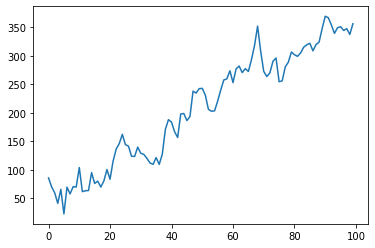

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
z=np.random.normal(0,20,100)
for t in range(1,100):
    z[t]=0.8*z[t-1]+z[t]

t = np.arange(1,101)
x = 50 + 3*t+z
plt.plot(x)

使用最小二乘法拟合一个线性回归模型

In [3]:
import statsmodels.api as sm

T = sm.add_constant(t)

model = sm.OLS(x,T)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1609.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           1.27e-62
Time:                        12:01:43   Log-Likelihood:                -459.02
No. Observations:                 100   AIC:                             922.0
Df Residuals:                      98   BIC:                             927.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.3060      4.852      7.895      0.000      28.677      47.935
x1             3.3464      0.083     40.117      0.000       3.181       3.512
==============================================================================
Omnibus:                        4.245   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                3.581
Skew:                           0.428   Prob(JB):                        0.167
Kurtosis:                       3.355   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

拟合的线性模型参数

In [7]:
fit.params

array([38.30603527,  3.34643229])

参数的标准差

In [10]:
np.sqrt(np.diag(fit.cov_params()))

array([4.85221573, 0.08341747])

In [6]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

残差的自相关情况

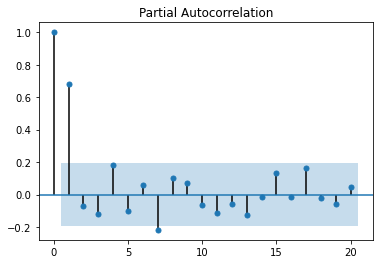

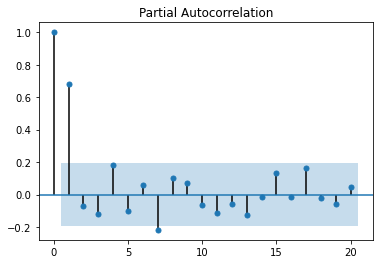

In [8]:
plot_pacf(fit.resid)

从自相关和部分自相关图中可以看到，拟合残差序列存在着明显的自相关。

下面使用GLS（广义最小二乘法）来进行估计参数。这样得到的参数置信区间会更加准确。

In [14]:
model=sm.GLSAR(x,T,rho=1)
fit=model.iterative_fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                          GLSAR   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     324.3
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           1.06e-32
Time:                        12:08:20   Log-Likelihood:                -421.42
No. Observations:                  99   AIC:                             846.8
Df Residuals:                      97   BIC:                             852.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2283     11.419      2.910      0.004      10.565      55.892
x1             3.4094      0.189     18.009      0.000       3.034       3.785
==============================================================================
Omnibus:                        1.144   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.810
Skew:                           0.215   Prob(JB):                        0.667
Kurtosis:                       3.103   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""